In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import numpy as np
import statistics
from scipy import stats
from scipy.stats import beta

In [2]:
# Initialize an empty list to hold individual dataframes
df_list = []

# Directory containing the text files
data_dir = '/app/random_snellen_letters_results'

# Loop through each text file and read it into a DataFrame
for filename in os.listdir(data_dir):
    if filename.startswith("results_") and filename.endswith(".txt"):
        filepath = os.path.join(data_dir, filename)
        # Assuming each line in the text file is a seperate entry
        temp_df = pd.read_csv(filepath, header=None, names=['Combination'])
        df_list.append(temp_df)
# Combine all the dataframe into a single dataframe
final_df = pd.concat(df_list, ignore_index=True)

In [3]:
# Initialize an empty list to hold individual dataframes
df_list = []

# Directory containing the text files
data_dir = '/app/random_snellen_letters_results'  # Update this path to the one in your Docker volume

# Loop through each text file and read it into a DataFrame
for filename in os.listdir(data_dir):
    if filename.startswith("results_") and filename.endswith(".txt"):
        filepath = os.path.join(data_dir, filename)
        # Assuming each line in the text file is a separate entry
        temp_df = pd.read_csv(filepath, header=None, names=['Combination'])
        df_list.append(temp_df)

# Combine all the dataframes into a single dataframe
df = pd.concat(df_list, ignore_index=True)

In [4]:
df.head(5)

,Combination
0,PCOTEDZ
1,TELZDFO
2,FPLZECO
3,DLCEPZO
4,CTLEZPD


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304893 entries, 0 to 304892
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Combination  304893 non-null  object
dtypes: object(1)
memory usage: 2.3+ MB


In [6]:
## Let's check the frequency of each letter in all the lines combined

In [7]:
from collections import Counter

# Initialize an empty Counter object to hold the frequencies of each letter
letter_frequency = Counter()

# Loop through each row in the DataFrame to update the letter frequencies
for index, row in df.iterrows():
    combination = row['Combination']
    letter_frequency.update(combination)
    
# Convert the Counter object to a DataFrame for easier analysis
letter_frequency_df = pd.DataFrame.from_dict(letter_frequency, orient='index', columns=['Frequency']).reset_index()
letter_frequency_df.rename(columns={'index': 'Letter'}, inplace=True)

# Sort the DataFrame by frequency
letter_frequency_df.sort_values('Frequency', ascending=False, inplace=True)

print(f'There are {len(letter_frequency_df)} unique letters to chose from')
letter_frequency_df

There are 9 unique letters to chose from


,Letter,Frequency
5,D,237695
4,E,237673
8,F,237402
2,O,237362
7,L,237286
0,P,237193
1,C,237058
6,Z,236538
3,T,236044


In [8]:
## Next we'll look at how random the combination of letters really was.

In [9]:
# Count the frequency of each unique 7-letter combination
combination_frequency = df['Combination'].value_counts().reset_index()

# Rename the columns for better readability
combination_frequency.columns = ['Combination', 'Frequency']

# Sort the DataFrame by frequency
combination_frequency.sort_values('Frequency', ascending=False, inplace=True)

print(combination_frequency.head())
print('\n')
print(f"The length of the original df is {len(df)}, and the length of combination_frequency is {len(combination_frequency)}")

    Combination  Frequency
0       DTPZCTZ          3
148     OCFZDZD          3
137     LDPFCLD          3
138     ETDOLFZ          3
139     LOEOLED          3


The length of the original df is 304893, and the length of combination_frequency is 291867


In [10]:
combination_frequency.tail()

,Combination,Frequency
105834,CDPEOEL,1
105835,LCDZFPT,1
105836,FTETEDE,1
105837,TCFTOCE,1
291866,CEDCLCP,1


In [11]:
# Calculate basic statistical measures for individual letter frequencies
mean_frequency = letter_frequency_df['Frequency'].mean()
median_frequency = letter_frequency_df['Frequency'].median()
std_frequency = letter_frequency_df['Frequency'].std()

print(f"This is the mean frequency: {mean_frequency}")
print(f"This is the median frequency: {median_frequency}")
print(f"Here is the standard deviation frequency: {std_frequency}")

This is the mean frequency: 237139.0
This is the median frequency: 237286.0
Here is the standard deviation frequency: 536.7147752764032


In [12]:
# Function to check if the combination is a palindrome
def is_palindrome(combination):
    return combination == combination[::-1]

# Function to find the letter that appears the most times
def max_repeated_letter(combination):
    letter_counts = Counter(combination)
    max_letter = max(letter_counts, key=letter_counts.get)
    return max_letter if letter_counts[max_letter] > 1 else None

# Function to measure letter diversity
def letter_diversity(combination):
    return len(set(combination)) / len(combination)

# Function to count the frequency of each letter in a combination and filter those that appear more than once
def count_repeated_letters(combination):
    letter_counts = Counter(combination)
    repeated_letters = {letter: count for letter, count in letter_counts.items() if count > 1}
    return repeated_letters if repeated_letters else None

# Add the new columns to the DataFrame
df['Is_Palindrome'] = df['Combination'].apply(is_palindrome)
df['Max_Repeated'] = df['Combination'].apply(max_repeated_letter)
df['Letter_Diversity'] = df['Combination'].apply(letter_diversity)
df['Repeated_Letters'] = df['Combination'].apply(count_repeated_letters)

In [13]:
df.head(20)

,Combination,Is_Palindrome,Max_Repeated,Letter_Diversity,Repeated_Letters
0,PCOTEDZ,False,None,1.0,None
1,TELZDFO,False,None,1.0,None
2,FPLZECO,False,None,1.0,None
3,DLCEPZO,False,None,1.0,None
4,CTLEZPD,False,None,1.0,None
5,ZFPCETO,False,None,1.0,None
6,FECZOLT,False,None,1.0,None
7,POCTDLE,False,None,1.0,None
8,LPTCZED,False,None,1.0,None
9,DZFPETL,False,None,1.0,None


In [14]:
df.tail(20)

,Combination,Is_Palindrome,Max_Repeated,Letter_Diversity,Repeated_Letters
304873,TLFZOZC,False,Z,0.857143,{'Z': 2}
304874,ZCLTPFT,False,T,0.857143,{'T': 2}
304875,OPTPZFZ,False,P,0.714286,"{'P': 2, 'Z': 2}"
304876,EFDFLET,False,E,0.714286,"{'E': 2, 'F': 2}"
304877,FCFDZOD,False,F,0.714286,"{'F': 2, 'D': 2}"
304878,DODLEDZ,False,D,0.714286,{'D': 3}
304879,FTOCZTL,False,T,0.857143,{'T': 2}
304880,OCODLDL,False,O,0.571429,"{'O': 2, 'D': 2, 'L': 2}"
304881,OTEPZOL,False,O,0.857143,{'O': 2}
304882,ZEOZDLE,False,Z,0.714286,"{'Z': 2, 'E': 2}"


## Historgram of Letter Diversity

In [15]:
df

,Combination,Is_Palindrome,Max_Repeated,Letter_Diversity,Repeated_Letters
0,PCOTEDZ,False,None,1.000000,None
1,TELZDFO,False,None,1.000000,None
2,FPLZECO,False,None,1.000000,None
3,DLCEPZO,False,None,1.000000,None
4,CTLEZPD,False,None,1.000000,None
...,...,...,...,...,...
304888,OCEDPFC,False,C,0.857143,{'C': 2}
304889,OECDZOZ,False,O,0.714286,"{'O': 2, 'Z': 2}"
304890,PTECDLT,False,T,0.857143,{'T': 2}
304891,OPOTPED,False,O,0.714286,"{'O': 2, 'P': 2}"


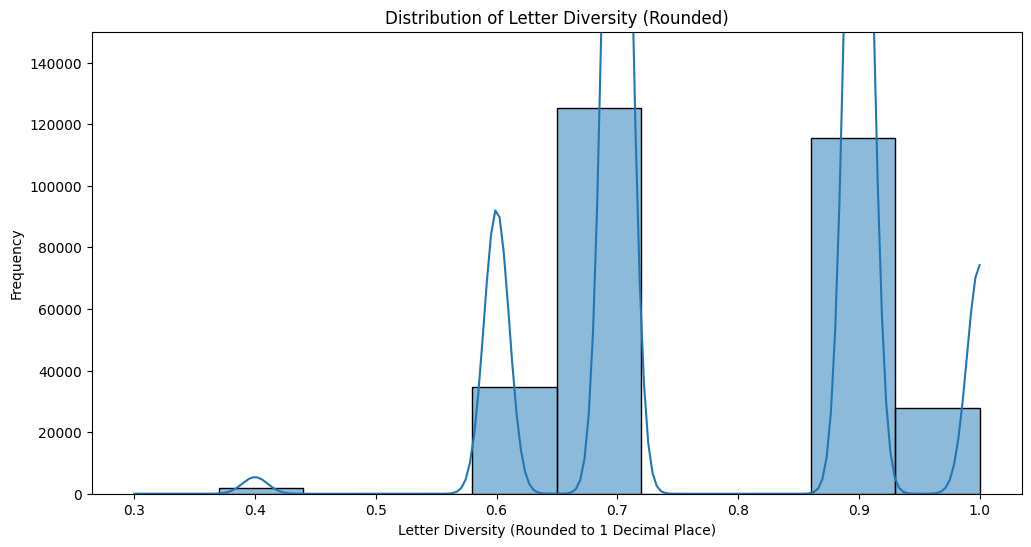

In [16]:
# Generate the histogram with a KDE (Kernel Density Estimation) curve
# Using only the first number after the decimal point for the 'Letter_Diversity' values
# Setting y-axis limit to 150,000 to focus on the lower range
plt.figure(figsize=(12, 6))
sb.histplot(df['Letter_Diversity'].round(1), bins=10, kde=True)

# Labels and title
plt.xlabel('Letter Diversity (Rounded to 1 Decimal Place)')
plt.ylabel('Frequency')
plt.title('Distribution of Letter Diversity (Rounded)')

# Set y-axis limit
plt.ylim(0, 150000)

# Show the plot
plt.show()


### Something Looks off about this, we should investigate. It doesn't even come close to resembling a bell curve

## Bar Chart for Max Repeated Letters

In [17]:
df

,Combination,Is_Palindrome,Max_Repeated,Letter_Diversity,Repeated_Letters
0,PCOTEDZ,False,None,1.000000,None
1,TELZDFO,False,None,1.000000,None
2,FPLZECO,False,None,1.000000,None
3,DLCEPZO,False,None,1.000000,None
4,CTLEZPD,False,None,1.000000,None
...,...,...,...,...,...
304888,OCEDPFC,False,C,0.857143,{'C': 2}
304889,OECDZOZ,False,O,0.714286,"{'O': 2, 'Z': 2}"
304890,PTECDLT,False,T,0.857143,{'T': 2}
304891,OPOTPED,False,O,0.714286,"{'O': 2, 'P': 2}"


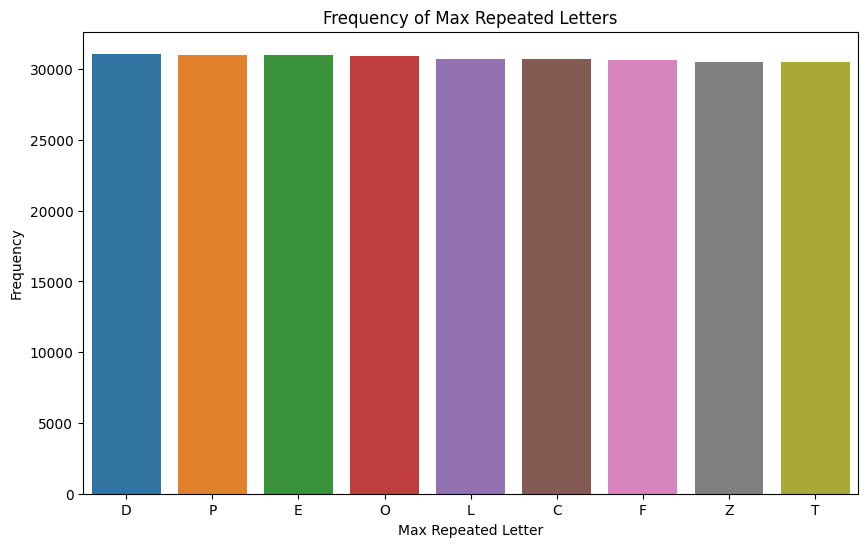

In [18]:
plt.figure(figsize=(10, 6))
sb.countplot(data=df, x='Max_Repeated', order=df['Max_Repeated'].value_counts().index)
plt.title('Frequency of Max Repeated Letters')
plt.xlabel('Max Repeated Letter')
plt.ylabel('Frequency')
plt.show()

In [19]:
## Histogram for Palindromes

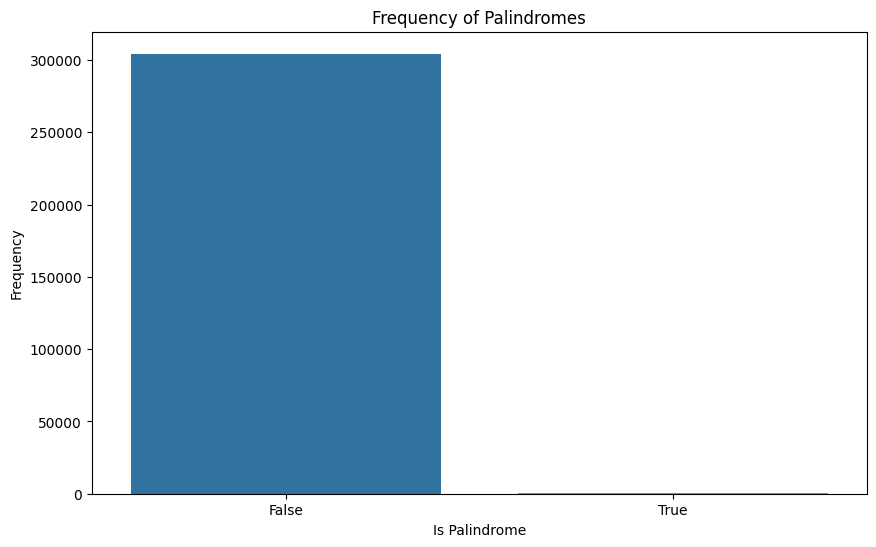

In [20]:
plt.figure(figsize=(10, 6))
sb.countplot(data=df, x='Is_Palindrome')
plt.title('Frequency of Palindromes')
plt.xlabel('Is Palindrome')
plt.ylabel('Frequency')
plt.show()

## Let's see how many random combinations have 2 unique letters repeated.
Since there are 7 letters in our lines, there will be one extra random letter,
We're trying to see if there are lines made up of mostly repeating letters. That's not 
very desirable


In [21]:
df

,Combination,Is_Palindrome,Max_Repeated,Letter_Diversity,Repeated_Letters
0,PCOTEDZ,False,None,1.000000,None
1,TELZDFO,False,None,1.000000,None
2,FPLZECO,False,None,1.000000,None
3,DLCEPZO,False,None,1.000000,None
4,CTLEZPD,False,None,1.000000,None
...,...,...,...,...,...
304888,OCEDPFC,False,C,0.857143,{'C': 2}
304889,OECDZOZ,False,O,0.714286,"{'O': 2, 'Z': 2}"
304890,PTECDLT,False,T,0.857143,{'T': 2}
304891,OPOTPED,False,O,0.714286,"{'O': 2, 'P': 2}"


In [22]:
# Filter the DataFrame to find combinations where only 2 letters are repeated
two_letter_repeat = df[df['Repeated_Letters'].apply(
    lambda x: x is not None and len(x) == 2 and all(count == 3 for count in x.values())
)]

# Count the number of such combinations
two_letter_repeat_count = len(two_letter_repeat)

print(f"There are {two_letter_repeat_count} lines that have 2 repeating letters.") 

There are 583 lines that have 2 repeating letters.


In [23]:
df

,Combination,Is_Palindrome,Max_Repeated,Letter_Diversity,Repeated_Letters
0,PCOTEDZ,False,None,1.000000,None
1,TELZDFO,False,None,1.000000,None
2,FPLZECO,False,None,1.000000,None
3,DLCEPZO,False,None,1.000000,None
4,CTLEZPD,False,None,1.000000,None
...,...,...,...,...,...
304888,OCEDPFC,False,C,0.857143,{'C': 2}
304889,OECDZOZ,False,O,0.714286,"{'O': 2, 'Z': 2}"
304890,PTECDLT,False,T,0.857143,{'T': 2}
304891,OPOTPED,False,O,0.714286,"{'O': 2, 'P': 2}"


In [24]:
# Filter the DataFrame to find combinations where the Letter Diversity starts with 0.6
diversity_06 = df[df['Letter_Diversity'].apply(lambda x: str(x).startswith('0.6'))]

print(len(diversity_06))
print(f"Why are there no values that start with .6??")

# Display the filtered DataFrame
diversity_06.head(49)  # Displaying only the head to avoid too much output. You can remove .head() to see all.


0
Why are there no values that start with .6??


,Combination,Is_Palindrome,Max_Repeated,Letter_Diversity,Repeated_Letters


In playing around with the percentage in 'Letter_Diversity' there are {len(diversity_02)} combinations that start with 20%. There are {len(diversity_03)} rows that are in the 30% range, and {len(diversity_04)} in 40%. Even in the 40% range, with a row of 7 random letters you can get some pretty repetitive results such as --
5869:TLOLOLO, 9431:TLCLCTC	and 9854:EPTPETE	

In [25]:
df

,Combination,Is_Palindrome,Max_Repeated,Letter_Diversity,Repeated_Letters
0,PCOTEDZ,False,None,1.000000,None
1,TELZDFO,False,None,1.000000,None
2,FPLZECO,False,None,1.000000,None
3,DLCEPZO,False,None,1.000000,None
4,CTLEZPD,False,None,1.000000,None
...,...,...,...,...,...
304888,OCEDPFC,False,C,0.857143,{'C': 2}
304889,OECDZOZ,False,O,0.714286,"{'O': 2, 'Z': 2}"
304890,PTECDLT,False,T,0.857143,{'T': 2}
304891,OPOTPED,False,O,0.714286,"{'O': 2, 'P': 2}"


In [26]:
# Calculate rounded diversity values and count their occurrences
rounded_diversity_counts = df['Letter_Diversity'].round(1).value_counts().sort_index()

# # Exclude mathematically impossible values (0.5 and 0.8)
# rounded_diversity_counts = rounded_diversity_counts[~rounded_diversity_counts.index.isin([0.5, 0.8])]

print("Counts for each rounded diversity value (excluding 0.5 and 0.8):")
print(rounded_diversity_counts)
print(f"I'm not seeing any values for 0.5, or 0.8 -- I wonder why that is")

Counts for each rounded diversity value (excluding 0.5 and 0.8):
0.3         6
0.4      2016
0.6     34539
0.7    125105
0.9    115475
1.0     27752
Name: Letter_Diversity, dtype: int64
I'm not seeing any values for 0.5, or 0.8 -- I wonder why that is


In [27]:
df

,Combination,Is_Palindrome,Max_Repeated,Letter_Diversity,Repeated_Letters
0,PCOTEDZ,False,None,1.000000,None
1,TELZDFO,False,None,1.000000,None
2,FPLZECO,False,None,1.000000,None
3,DLCEPZO,False,None,1.000000,None
4,CTLEZPD,False,None,1.000000,None
...,...,...,...,...,...
304888,OCEDPFC,False,C,0.857143,{'C': 2}
304889,OECDZOZ,False,O,0.714286,"{'O': 2, 'Z': 2}"
304890,PTECDLT,False,T,0.857143,{'T': 2}
304891,OPOTPED,False,O,0.714286,"{'O': 2, 'P': 2}"


In [28]:
# Initialize an empty dictionary to store counts
diversity_startswith_counts = {}

# Loop over possible starting decimals from 0.3 to 1.0
for i in range(3, 11):
    starting_decimal = '0.' + str(i)
    
    # Filter the DataFrame based on the starting decimal and count the number of rows
    filtered_df = df[df['Letter_Diversity'].apply(lambda x: str(x).startswith(starting_decimal))]
    diversity_startswith_counts[starting_decimal] = len(filtered_df)

# Display the counts
print("Counts for each diversity value that starts with a specific decimal:")
for key, value in diversity_startswith_counts.items():
    print(f"{key}: {value}")
print(f"This doesn't look right. Let's get back to the basics and check value_counts()")

Counts for each diversity value that starts with a specific decimal:
0.3: 0
0.4: 2016
0.5: 34539
0.6: 0
0.7: 125105
0.8: 115475
0.9: 0
0.10: 0
This doesn't look right. Let's get back to the basics and check value_counts()


In [29]:
df

,Combination,Is_Palindrome,Max_Repeated,Letter_Diversity,Repeated_Letters
0,PCOTEDZ,False,None,1.000000,None
1,TELZDFO,False,None,1.000000,None
2,FPLZECO,False,None,1.000000,None
3,DLCEPZO,False,None,1.000000,None
4,CTLEZPD,False,None,1.000000,None
...,...,...,...,...,...
304888,OCEDPFC,False,C,0.857143,{'C': 2}
304889,OECDZOZ,False,O,0.714286,"{'O': 2, 'Z': 2}"
304890,PTECDLT,False,T,0.857143,{'T': 2}
304891,OPOTPED,False,O,0.714286,"{'O': 2, 'P': 2}"


In [30]:
counter = df['Letter_Diversity'].value_counts()
print(counter)
vals = set(counter.keys())
vals
print(f"Okay, now we see that the variety of numbers is extremely limited ({vals}). They are discrete values")

0.714286    125105
0.857143    115475
0.571429     34539
1.000000     27752
0.428571      2016
0.285714         6
Name: Letter_Diversity, dtype: int64
Okay, now we see that the variety of numbers is extremely limited ({0.7142857142857143, 0.8571428571428571, 0.5714285714285714, 0.42857142857142855, 1.0, 0.2857142857142857}). They are discrete values


## Now that we know there are discrete values only, we can recheck distribution

In [31]:
df

,Combination,Is_Palindrome,Max_Repeated,Letter_Diversity,Repeated_Letters
0,PCOTEDZ,False,None,1.000000,None
1,TELZDFO,False,None,1.000000,None
2,FPLZECO,False,None,1.000000,None
3,DLCEPZO,False,None,1.000000,None
4,CTLEZPD,False,None,1.000000,None
...,...,...,...,...,...
304888,OCEDPFC,False,C,0.857143,{'C': 2}
304889,OECDZOZ,False,O,0.714286,"{'O': 2, 'Z': 2}"
304890,PTECDLT,False,T,0.857143,{'T': 2}
304891,OPOTPED,False,O,0.714286,"{'O': 2, 'P': 2}"


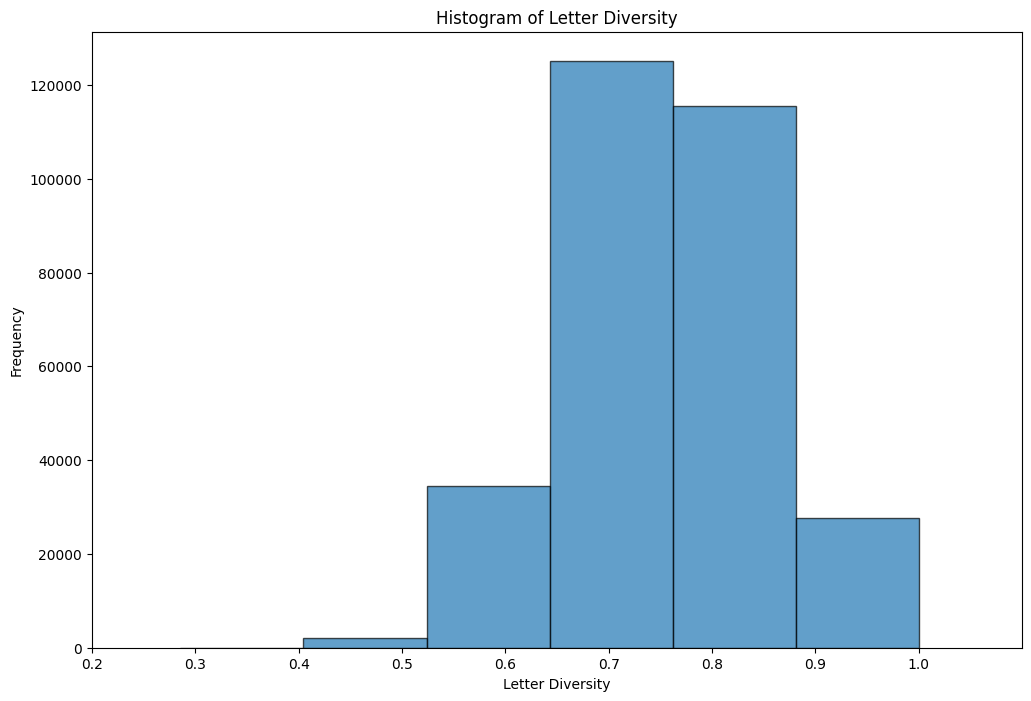

In [32]:
# Updating the sample data to simulate the DataFrame with the values you provided.
data = {'Letter_Diversity': [0.714286]*125105 + [0.857143]*115475 + [0.571429]*34539 +
        [1.000000]*27752 + [0.428571]*2016 + [0.285714]*6}

df_1 = pd.DataFrame(data)

# Create the histogram
plt.figure(figsize=(12, 8))
plt.hist(df_1['Letter_Diversity'], bins=6, edgecolor='black', alpha=0.7, label='Letter Diversity')
plt.xlim([0.2, 1.1])

# Adding the x-ticks
plt.xticks(np.arange(0.2, 1.1, 0.1))

# Add a title and labels
plt.title('Histogram of Letter Diversity')
plt.xlabel('Letter Diversity')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [33]:
df

,Combination,Is_Palindrome,Max_Repeated,Letter_Diversity,Repeated_Letters
0,PCOTEDZ,False,None,1.000000,None
1,TELZDFO,False,None,1.000000,None
2,FPLZECO,False,None,1.000000,None
3,DLCEPZO,False,None,1.000000,None
4,CTLEZPD,False,None,1.000000,None
...,...,...,...,...,...
304888,OCEDPFC,False,C,0.857143,{'C': 2}
304889,OECDZOZ,False,O,0.714286,"{'O': 2, 'Z': 2}"
304890,PTECDLT,False,T,0.857143,{'T': 2}
304891,OPOTPED,False,O,0.714286,"{'O': 2, 'P': 2}"


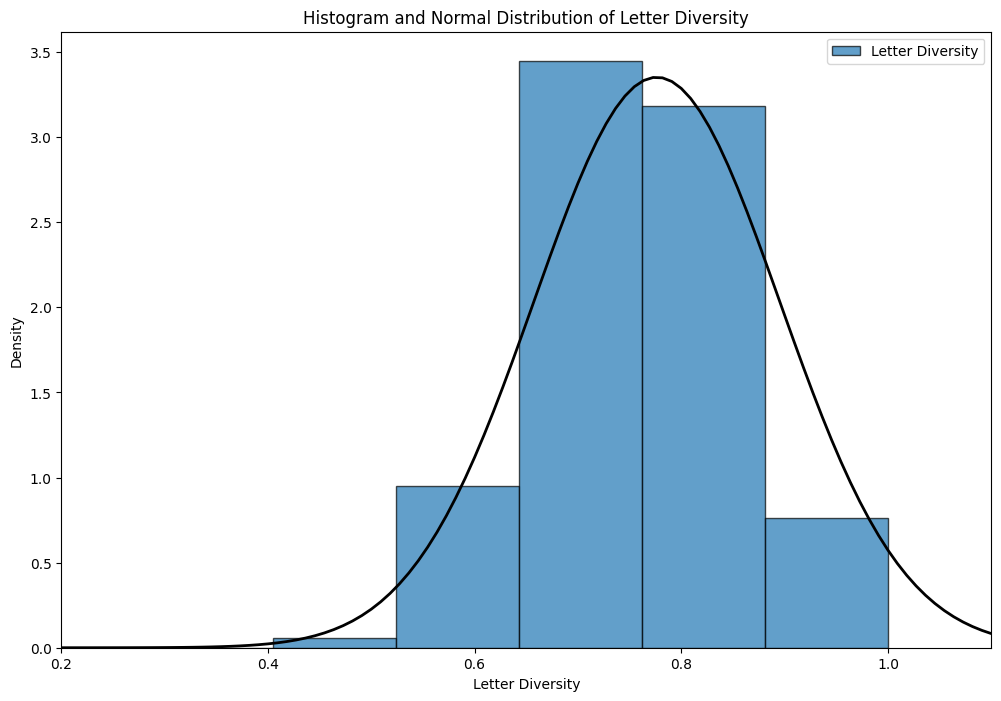

In [34]:
from scipy.stats import norm

# Create the histogram
plt.figure(figsize=(12, 8))
n, bins, patches = plt.hist(df['Letter_Diversity'], bins=6, edgecolor='black', alpha=0.7, label='Letter Diversity', density=True)
plt.xlim([0.2, 1.1])

# Fit a normal distribution to the data
mu, std = norm.fit(df['Letter_Diversity'])

# Plot the PDF of the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Add a title and labels
plt.title('Histogram and Normal Distribution of Letter Diversity')
plt.xlabel('Letter Diversity')
plt.ylabel('Density')

# Add legends
plt.legend()

# Show the plot
plt.show()


In [35]:
df

,Combination,Is_Palindrome,Max_Repeated,Letter_Diversity,Repeated_Letters
0,PCOTEDZ,False,None,1.000000,None
1,TELZDFO,False,None,1.000000,None
2,FPLZECO,False,None,1.000000,None
3,DLCEPZO,False,None,1.000000,None
4,CTLEZPD,False,None,1.000000,None
...,...,...,...,...,...
304888,OCEDPFC,False,C,0.857143,{'C': 2}
304889,OECDZOZ,False,O,0.714286,"{'O': 2, 'Z': 2}"
304890,PTECDLT,False,T,0.857143,{'T': 2}
304891,OPOTPED,False,O,0.714286,"{'O': 2, 'P': 2}"


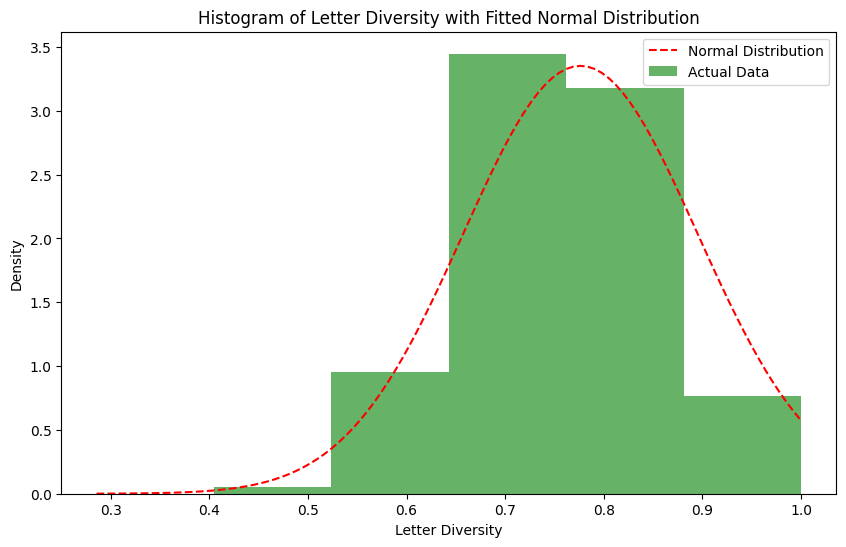

In [36]:
from scipy.stats import norm
import numpy as np

# Calculate the mean and standard deviation of the Letter Diversity column
mean, std = df['Letter_Diversity'].mean(), df['Letter_Diversity'].std()

# Create an array of x values representing the diversity values for plotting the normal distribution
x_values = np.linspace(df['Letter_Diversity'].min(), df['Letter_Diversity'].max(), 100)

# Calculate the y values based on the probability density function of the normal distribution
y_values = norm.pdf(x_values, mean, std)

# Create the histogram and normal distribution curve
plt.figure(figsize=(10, 6))
plt.hist(df['Letter_Diversity'], bins=6, density=True, alpha=0.6, color='g', label='Actual Data')
plt.plot(x_values, y_values, 'r--', label='Normal Distribution')
plt.title('Histogram of Letter Diversity with Fitted Normal Distribution')
plt.xlabel('Letter Diversity')
plt.ylabel('Density')
plt.legend()
plt.show()


In [37]:
df

,Combination,Is_Palindrome,Max_Repeated,Letter_Diversity,Repeated_Letters
0,PCOTEDZ,False,None,1.000000,None
1,TELZDFO,False,None,1.000000,None
2,FPLZECO,False,None,1.000000,None
3,DLCEPZO,False,None,1.000000,None
4,CTLEZPD,False,None,1.000000,None
...,...,...,...,...,...
304888,OCEDPFC,False,C,0.857143,{'C': 2}
304889,OECDZOZ,False,O,0.714286,"{'O': 2, 'Z': 2}"
304890,PTECDLT,False,T,0.857143,{'T': 2}
304891,OPOTPED,False,O,0.714286,"{'O': 2, 'P': 2}"


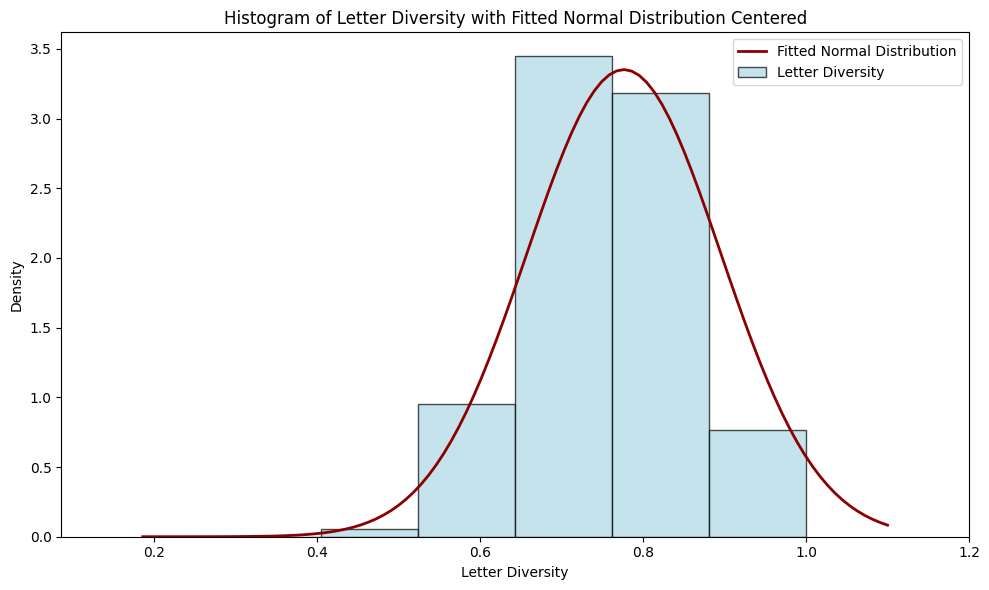

In [38]:
# Calculate the range for x-axis
x_range = np.linspace(df['Letter_Diversity'].min() - 0.1, df['Letter_Diversity'].max() + 0.1, 100)

# Calculate the normal distribution values based on the mean and standard deviation of the data
y_values = norm.pdf(x_range, df['Letter_Diversity'].mean(), df['Letter_Diversity'].std())

# Plot the histogram and the normal distribution curve
plt.figure(figsize=(10, 6))
plt.hist(df['Letter_Diversity'], bins=6, density=True, color='lightblue', edgecolor='black', alpha=0.7, label='Letter Diversity')
plt.plot(x_range, y_values, color='darkred', lw=2, label='Fitted Normal Distribution')

plt.title("Histogram of Letter Diversity with Fitted Normal Distribution Centered")
plt.xlabel("Letter Diversity")
plt.ylabel("Density")
plt.legend()
plt.xlim(df['Letter_Diversity'].min() - 0.2, df['Letter_Diversity'].max() + 0.2)  # Extend x-axis range for better visual
plt.tight_layout()
plt.show()


In [39]:
df

,Combination,Is_Palindrome,Max_Repeated,Letter_Diversity,Repeated_Letters
0,PCOTEDZ,False,None,1.000000,None
1,TELZDFO,False,None,1.000000,None
2,FPLZECO,False,None,1.000000,None
3,DLCEPZO,False,None,1.000000,None
4,CTLEZPD,False,None,1.000000,None
...,...,...,...,...,...
304888,OCEDPFC,False,C,0.857143,{'C': 2}
304889,OECDZOZ,False,O,0.714286,"{'O': 2, 'Z': 2}"
304890,PTECDLT,False,T,0.857143,{'T': 2}
304891,OPOTPED,False,O,0.714286,"{'O': 2, 'P': 2}"


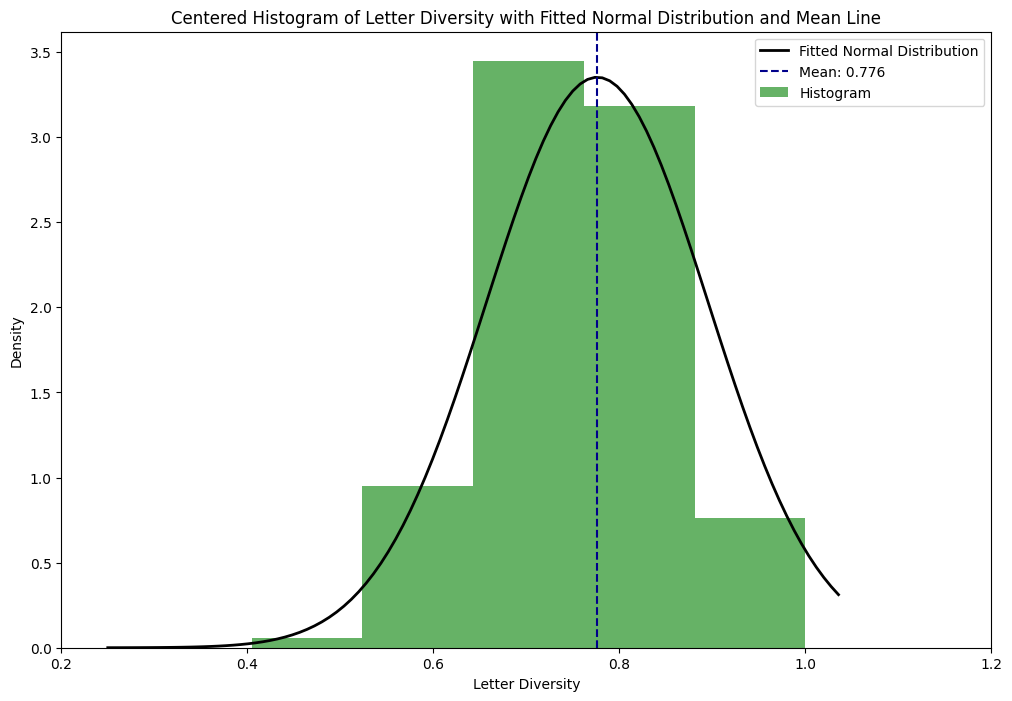

In [40]:
# To center the distribution and mean line in the plot, we need to adjust the x-axis limits.

# Plotting the histogram
plt.figure(figsize=(12, 8))
plt.hist(df['Letter_Diversity'], bins=6, density=True, alpha=0.6, color='g', label='Histogram')

# Plotting the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Fitted Normal Distribution')

# Adding the mean line
mean = np.mean(df['Letter_Diversity'])
plt.axvline(mean, color='darkblue', linestyle='--', label=f'Mean: {mean:.3f}')

# Centering the plot by adjusting x-axis limits
plt.xlim(0.2, 1.2)

# Adding titles and labels
plt.title("Centered Histogram of Letter Diversity with Fitted Normal Distribution and Mean Line")
plt.xlabel("Letter Diversity")
plt.ylabel("Density")

# Adding legend
plt.legend()

plt.show()


In [41]:
df

,Combination,Is_Palindrome,Max_Repeated,Letter_Diversity,Repeated_Letters
0,PCOTEDZ,False,None,1.000000,None
1,TELZDFO,False,None,1.000000,None
2,FPLZECO,False,None,1.000000,None
3,DLCEPZO,False,None,1.000000,None
4,CTLEZPD,False,None,1.000000,None
...,...,...,...,...,...
304888,OCEDPFC,False,C,0.857143,{'C': 2}
304889,OECDZOZ,False,O,0.714286,"{'O': 2, 'Z': 2}"
304890,PTECDLT,False,T,0.857143,{'T': 2}
304891,OPOTPED,False,O,0.714286,"{'O': 2, 'P': 2}"


In [42]:
kurt = stats.kurtosis(df['Letter_Diversity'])
print(f"The kurtosis for the distribution is {kurt : .2f}. This is pushing the limit of normal and\nnearing Leptokurtic, which occurs if the number is less than -1 or greater than +1")

The kurtosis for the distribution is -0.27. This is pushing the limit of normal and
nearing Leptokurtic, which occurs if the number is less than -1 or greater than +1


##  In a normal case, the normal distribution is unbounded, meaning it technically extends from negative infinity to positive infinity. However, in some real-world data like ours, the distribution is bounded within a specific range—in this case, between 0 and 1.

### A bounded distribution won't perfectly match a normal distribution, and this could potentially explain the kurtosis value that's pushing the limits of what's considered "normal."


## Trying Beta distribution

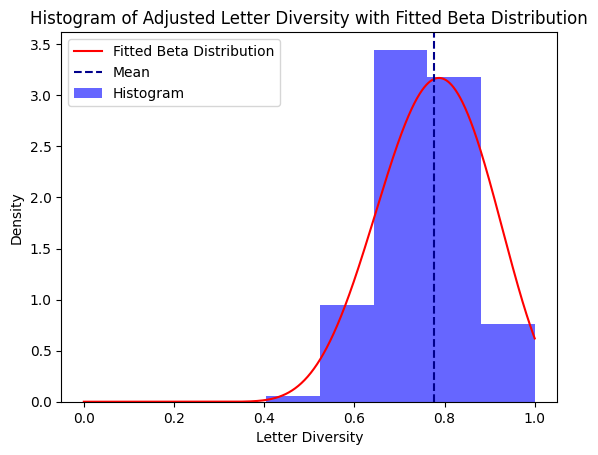

(7.384770199624683, 5.606322080256072, 0.2643658729512487, 0.9008515529181078)

In [43]:
# Import the necessary libraries
from scipy.stats import beta
import numpy as np

# Copy the original data to avoid modifying it
df_adjusted = df.copy()

# Adjust the 1.0 values to 0.9999
df_adjusted['Letter_Diversity'] = df_adjusted['Letter_Diversity'].apply(lambda x: 0.9999 if x == 1.0 else x)

# Fit a beta distribution to the data
params = beta.fit(df_adjusted['Letter_Diversity'])

# Generate x values to plot the PDF
x = np.linspace(0, 1, 1000)

# Compute the PDF for these x values
pdf_fitted = beta.pdf(x, *params)

# Plot the histogram and the fitted PDF
plt.hist(df_adjusted['Letter_Diversity'], bins=6, density=True, alpha=0.6, color='blue', label='Histogram')
plt.plot(x, pdf_fitted, 'r-', label='Fitted Beta Distribution')
plt.axvline(np.mean(df_adjusted['Letter_Diversity']), color='darkblue', linestyle='--', label='Mean')

# Add labels and title
plt.xlabel('Letter Diversity')
plt.ylabel('Density')
plt.title('Histogram of Adjusted Letter Diversity with Fitted Beta Distribution')
plt.legend()
plt.show()

params

In [52]:
df['Letter_Diversity'].value_counts()

0.714286    125105
0.857143    115475
0.571429     34539
1.000000     27752
0.428571      2016
0.285714         6
Name: Letter_Diversity, dtype: int64

## I want to run the code again in Docker with a new filter - only return a line of letters if the diversity is above a certain value. Let's print out some examples from each 'Letter_Diversity' and see what they look like so we can make a judgement on that value

In [53]:
# List of diversity values to filter on
diversity_values = [0.2857142857142857, 0.42857142857142855, 0.5714285714285714, 0.7142857142857143, 0.8571428571428571, 1.0]

# Create an empty dictionary to store the filtered DataFrames
filtered_dfs = {}

# Loop through each diversity value
for val in diversity_values:
    # Filter DataFrame based on Letter_Diversity value
    filtered_df = df[df['Letter_Diversity'] == val]
    
    # Store the filtered DataFrame in the dictionary
    filtered_dfs[val] = filtered_df

# Print sample combinations for each diversity value
for val, filtered_df in filtered_dfs.items():
    print(f"Sample combinations for diversity value {val}:")
    if not filtered_df.empty and len(filtered_df) > 10:
        num_samples = min(20, len(filtered_df))  # Limiting to 20 samples or the DataFrame's length, whichever is smaller
        print(filtered_df['Combination'].sample(num_samples))
    else:
        print(f"Too few samples (only {len(filtered_df)}). Skipping.")
    print('-'*50)


Sample combinations for diversity value 0.2857142857142857:
Too few samples (only 6). Skipping.
--------------------------------------------------
Sample combinations for diversity value 0.42857142857142855:
24852     OLDLODL
141938    EZPEZPE
134358    LFLFDFD
112064    ZFOZOZF
245067    CPCLPCL
168975    ZLTLZTZ
112448    CDLDCDL
157176    DODOPDP
93824     LPLPOPO
63200     FEZEFEZ
59960     FLFLFLO
16666     DTFTFTF
112730    ZOTZTZO
140245    OCOTOTO
29466     DFDFDFO
255327    FCFZFZF
113792    DEDEDEL
84081     ZTZTZCT
276331    LZLEZLZ
280978    LEFLFLF
Name: Combination, dtype: object
--------------------------------------------------
Sample combinations for diversity value 0.5714285714285714:
229171    LOEDLDL
290762    OFZLFZF
179698    DFDPEDE
262250    DZOEODE
207880    DLTDLTP
155568    CTLOLTL
304017    ZEPEPDE
80212     PFPEPDP
217703    PFEFETF
241844    CEODOCO
193069    FZFLCLF
255272    PDCDFPF
271472    PDTDPZD
39484     PTLPZTL
41517     PFOCPFO
67602     ELFELDL


Just purely on a feeling, I'm thinking that anything less than '0.7142857142857143' should be excluded from our results. Let's go back to VSCode and try to implement this logic into our code